# YSSMB model sanity check

## Step 1: Check that all of the $\Phi(\bm{q})$ follow the right Gaussian distribution

For a given $\bm{q}$, the Fourier transform of the molecular geometry field $\Phi(\bm{q})$ where $\bm{q} = \left(h/N_x, k/N_y, l/N_z\right) 2\pi/a$, where $(h,k,l)\in\mathbb{Z}_{N_x\times N_y \times N_z}$, $a = 10\text{\AA}$ is the lattice constant, and $N_x = 32$, $N_y = N_z = 16$.

By construcution, $\Phi(\bm{q})\sim\mathcal{N}(0,[\beta K q^2]^{-1})$, with $\beta = (k_{B}T)^{-1}$ and $T = 300\,\text{K}$, and $K = 0.0034\,\text{eV/\AA}$.

[16 15 13]
[plt_utils.histogram] dx = 1.156785973157671
29.757134515569543


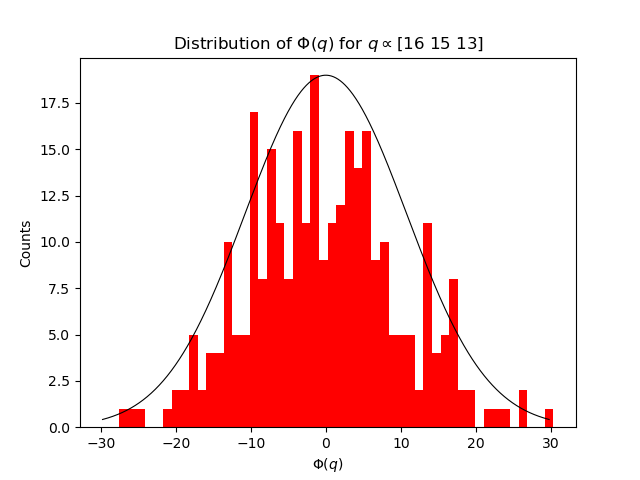

[16  3  1]
[plt_utils.histogram] dx = 5.788003267917872
151.86177016374438


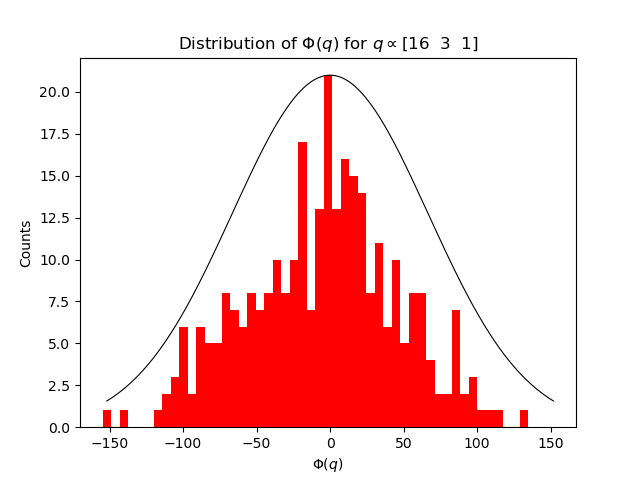

[1 5 8]
[plt_utils.histogram] dx = 4.258428139352785
118.74551708183377


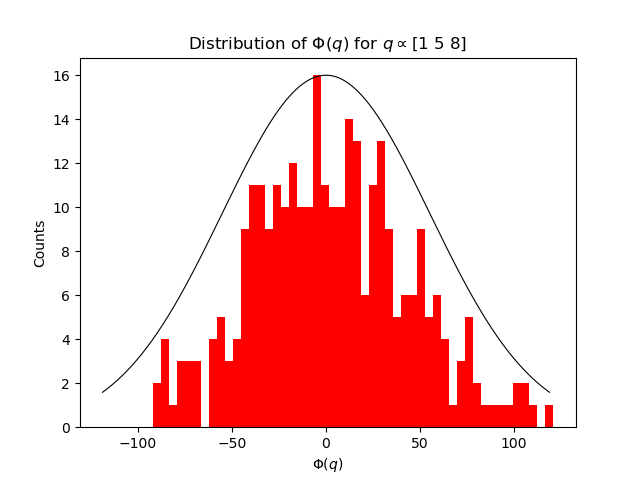

[27 14  1]
[plt_utils.histogram] dx = 1.332488004344767
34.14968398189325


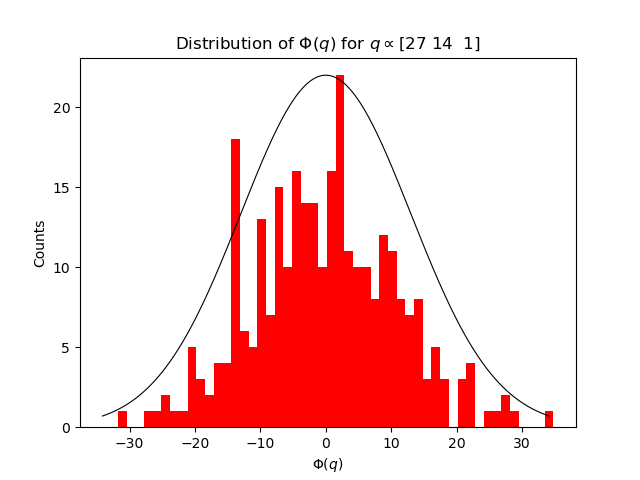

[14 15 12]
[plt_utils.histogram] dx = 1.0438430654318203
26.529462612744737


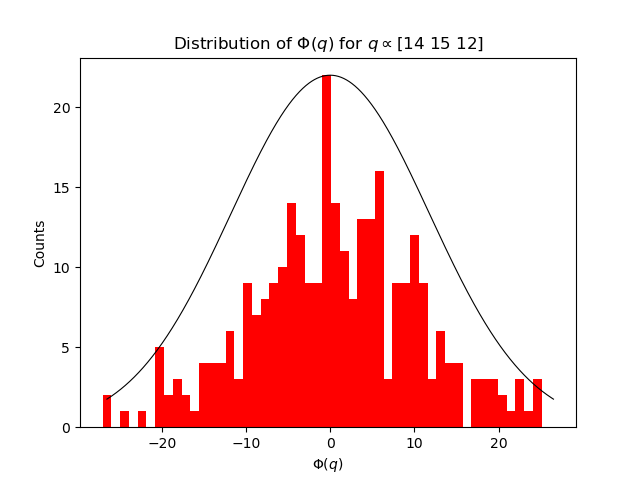

[20 13  2]
[plt_utils.histogram] dx = 1.9032689012636046
47.75284037871522


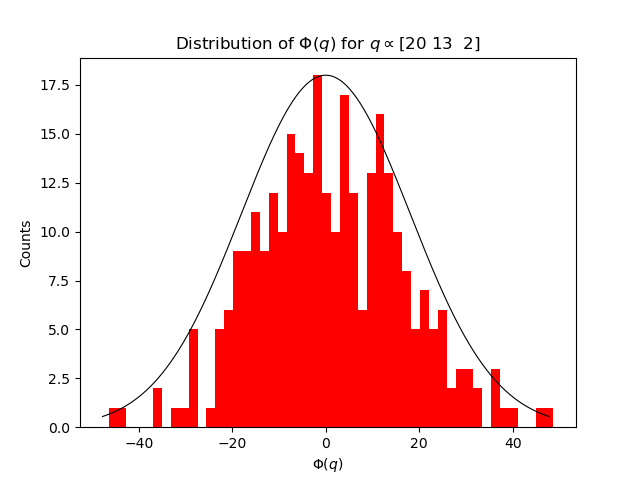

[21  0  9]
[plt_utils.histogram] dx = 2.606114021444063
68.62367343211221


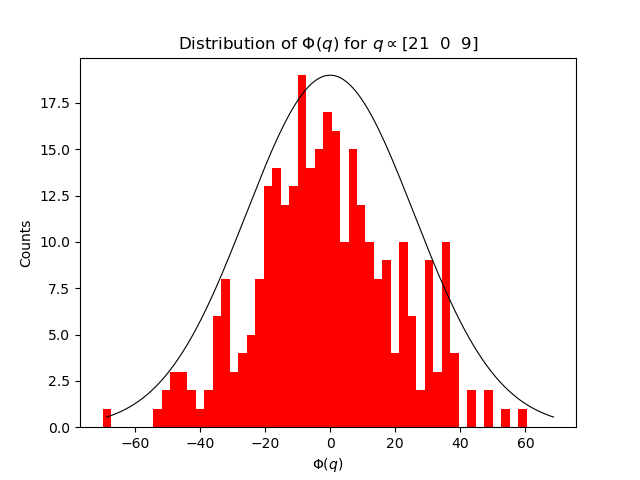

[13  7  8]
[plt_utils.histogram] dx = 2.932539983594347
81.61537029313438


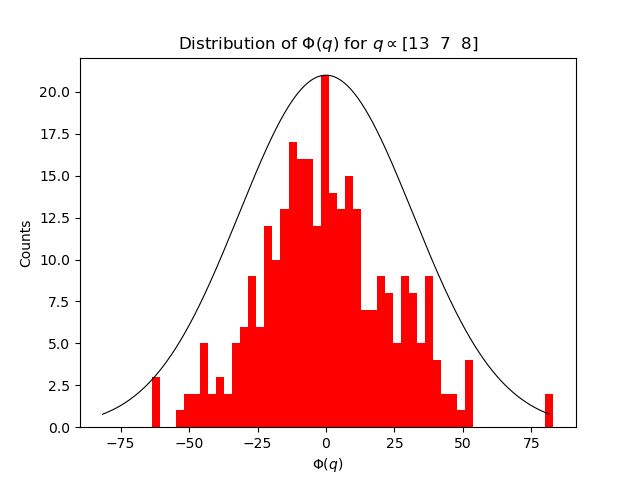

[27 11  4]
[plt_utils.histogram] dx = 1.5743837969959167
40.408497379482476


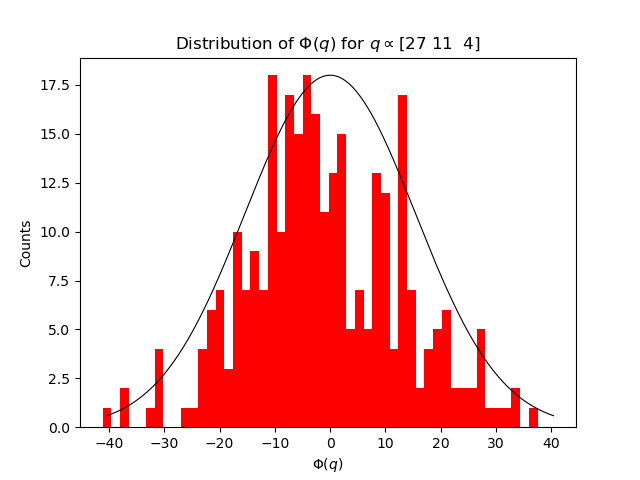

[ 1  5 15]
[plt_utils.histogram] dx = 2.0140535136997357
49.577851471005005


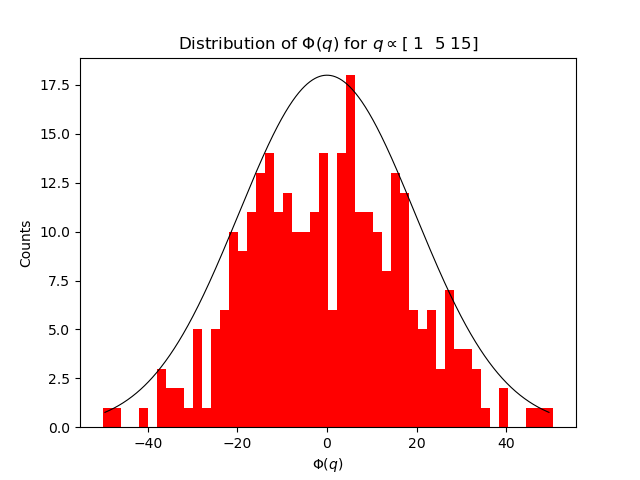

In [1]:
%matplotlib widget

import numpy as np
from qcnico.plt_utils import histogram
import matplotlib.pyplot as plt


def normal_curve(x,mu=0,sigma=1):
    A = 1.0 #/(sigma*np.sqrt(2*np.pi))
    return A * np.exp(-((x-mu)**2)/(2*sigma**2))


N1 = 32
N2 = 16
a = 10

datadir = '/Users/nico/Desktop/simulation_outputs/yssmb_hopping/'
sampled_ft_mgfs = np.load(datadir + f'sampled_ft_mgfs_{N1}x{N2}x{N2}.npy')
sample_inds = np.load(datadir + f'sampled_inds_{N1}x{N2}x{N2}.npy')

kB = 8.617333262e-5
T = 300
beta = 1.0/(kB*T)
K = 0.0034


for ft_mgf, ii in zip(sampled_ft_mgfs, sample_inds):
    print(ii)
    q = np.linalg.norm(ii / np.array([N1,N2,N2])) * 2*np.pi / a
    fig, ax = plt.subplots()
    centers, counts = histogram(ft_mgf,nbins=50,xlabel='$\\Phi(q)$', plt_objs=(fig, ax),return_data=True, show=False)
    max_count = np.max(counts)
    max_center = np.max(np.abs(centers))
    print(max_center)
    x = np.linspace(-max_center, max_center,1000)
    sigma = 1.0 / (beta * K * (q**2))

    y = max_count * normal_curve(x,mu=0,sigma=sigma)
    ax.plot(x,y,'k-',lw=0.8)
    ax.set_title(f'Distribution of $\Phi({{q}})$ for ${{q}}\propto${ii}')
    plt.show()





Since all $\Phi(\bm{q})\sim \mathcal{N}(0, [\beta K q^2]^{-1})$, we must have: $\beta K q^2 \cdot \Phi(\bm{q})\sim\mathcal{N}(0,1)$. Let's check that all the rescaled $\Phi(\bm{q})$ follow the standard normal distribution.

[16 15 13]
[plt_utils.histogram] dx = 0.10745411129313567
[16  3  1]
[plt_utils.histogram] dx = 0.0868690420147546
[1 5 8]
[plt_utils.histogram] dx = 0.0770836183561276
[27 14  1]
[plt_utils.histogram] dx = 0.10249281993503631
[14 15 12]
[plt_utils.histogram] dx = 0.08849445051927378
[20 13  2]
[plt_utils.histogram] dx = 0.10538222000455506
[21  0  9]
[plt_utils.histogram] dx = 0.10108795280173108
[13  7  8]
[plt_utils.histogram] dx = 0.09233792178832921
[27 11  4]
[plt_utils.histogram] dx = 0.10194033635708451
[ 1  5 15]
[plt_utils.histogram] dx = 0.10222323873714256


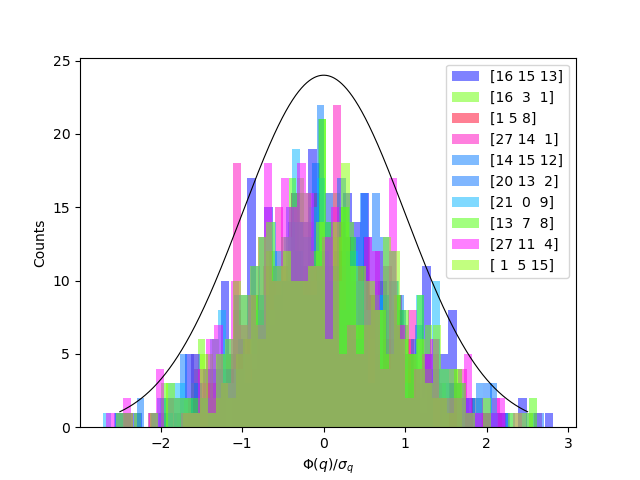

In [2]:
from qcnico.plt_utils import get_cm

qnorms = np.linalg.norm(sample_inds,axis=1)
clrs = get_cm(qnorms,'gist_rainbow',max_val=1.0)

fig, ax = plt.subplots()

for ft_mgf, ii, c in zip(sampled_ft_mgfs, sample_inds, clrs):
    print(ii)
    q = np.linalg.norm(ii / np.array([N1,N2,N2])) * 2*np.pi / a
    sigma = 1.0 / (beta * K * (q**2)) 
    centers, counts = histogram(ft_mgf/sigma,nbins=50,xlabel='$\\Phi(q)/\sigma_{q}$', plt_objs=(fig, ax),return_data=True, show=False, plt_kwargs={'alpha':0.5, 'color':c, 'label': f'{ii}'})

x = np.linspace(-2.5,2.5,1000)
y = normal_curve(x) * 24
ax.plot(x,y,'k-',lw=0.8)
plt.legend()
plt.show()

Ok, all the rescaled $\Phi(\bm{q}) \rightarrow \Phi(\bm{q})/\sigma_{\bm{q}}$ follow $\mathcal{N}(0,1)$. So far so good.

## Step 2: Checking energy correlations

Applying an inverse Fourier transform to $\Phi(\bm{q})$, we can obtain molecular geometry field $\phi(\bm{r})$, and the site energies $\varepsilon(\bm{R}_j) = \nu \phi(\bm{R}_j)$, where $\nu = 0.3\,\text{eV}$, and $\bm{R}_j$ is a lattice site.

We must have $\langle\varepsilon(\bm{R}_j)\varepsilon(\bm{R}_k)\rangle = \frac{\nu^2}{4\pi\beta KR_{jk}}$, where $R_{jk} = |\bm{R}_j - \bm{R}_k|$.

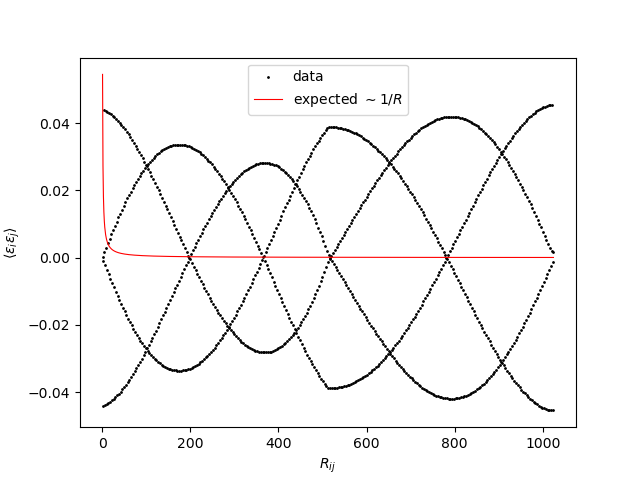

In [5]:
import scipy.fft as fft
from qcnico.plt_utils import get_cm


def avg_ecorrs(pds, ecorrs):
    pd_un, inds, counts = np.unique(pds, return_inverse=True, return_counts=True)
    nb_unique = pd_un.shape[0]
    avg_ecorrs = np.zeros(nb_unique, dtype=float)
    for k, ec in enumerate(ecorrs):
        iunique = inds[k]
        avg_ecorrs[iunique] += ec
    avg_ecorrs /= counts 
    return pd_un, avg_ecorrs


# pairdists = np.load(datadir + f'pairdists_{N1}x{N2}x{N2}.npy')
# energy_correlations = np.load(datadir + f'avg_ecorr_{N1}x{N2}x{N2}.npy')

pairdists = np.load(datadir + f'pairdists_1024.npy')
energy_correlations = np.load(datadir + f'avg_ecorr_complex_fftshift_1024.npy')
clrs = get_cm(np.arange(pairdists.shape[0]),'inferno')


pd_unique, avg_energy_correlations = avg_ecorrs(pairdists, energy_correlations)
# clrs = get_cm(np.arange(pd_unique.shape[0]),'inferno')



nu = 0.3
omega = N1 * N2 * N2 * (a**3)
y = (nu**2)/(4*np.pi*beta*K*pd_unique)

fig, ax = plt.subplots()
ax.scatter(pd_unique,avg_energy_correlations, c='k', s=1.0, label='data')
ax.plot(pd_unique,y,'r-',lw=0.8,label='expected $\sim1/R$')
# ax.scatter(pairdists,energy_correlations, c=clrs, s=1.0, label='data')
# ax.plot(pd_unique,y,'r-',lw=0.8,label='expected $\sim1/R$')
ax.set_xlabel('$R_{ij}$')
ax.set_ylabel('$\langle\\varepsilon_i \\varepsilon_j\\rangle$')
plt.legend()
plt.show()

OK, not good. What is going on? Let's plot some of the $\phi(\bm{r})$.


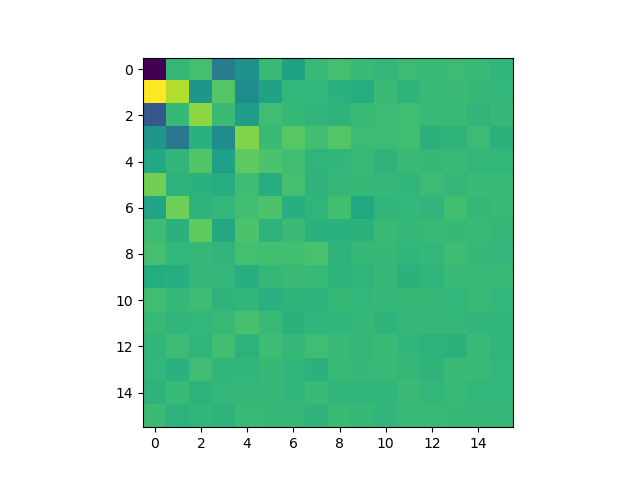

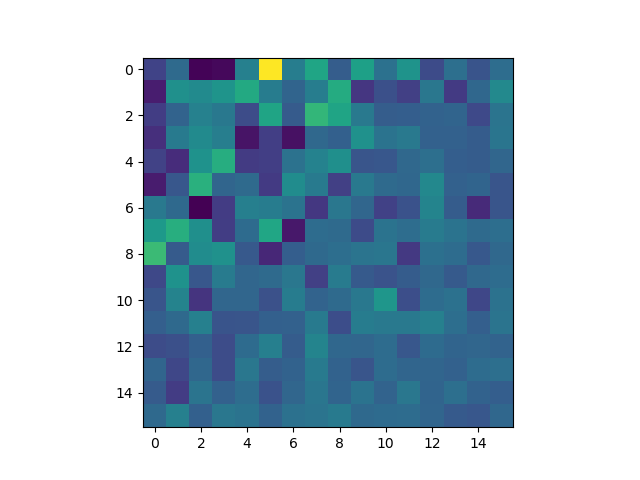

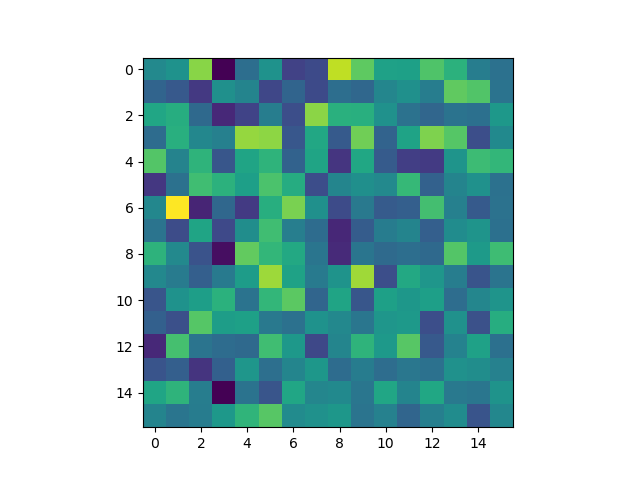

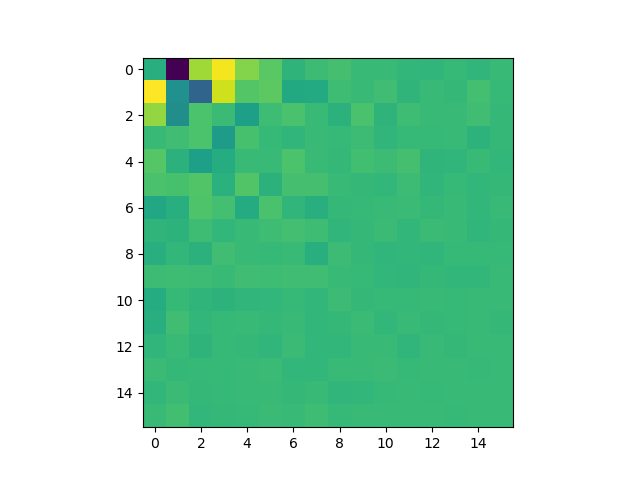

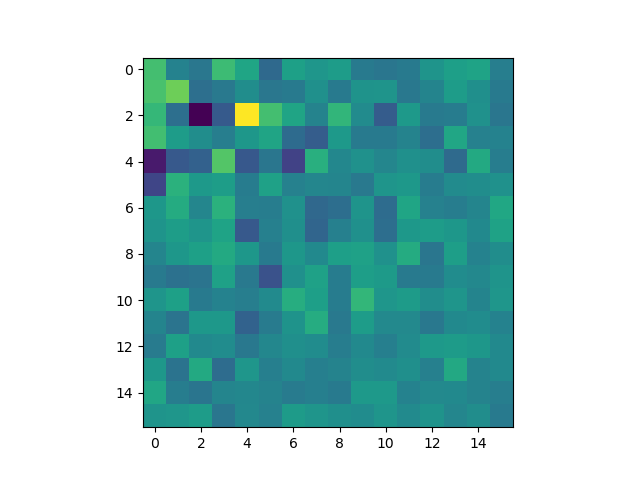

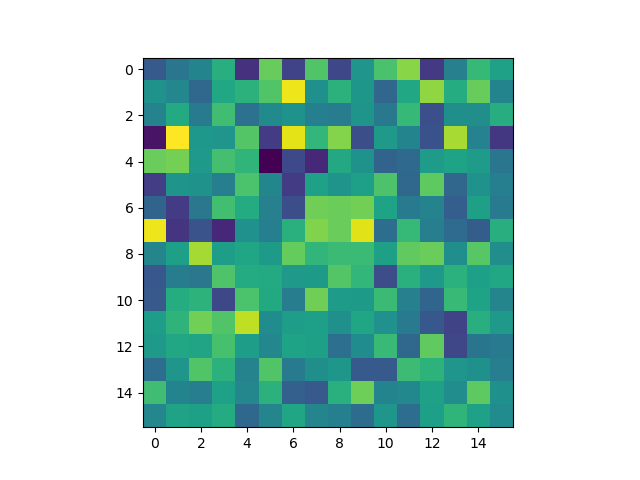

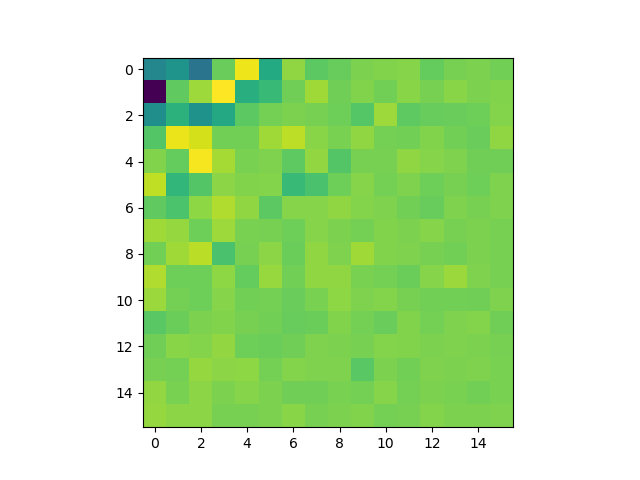

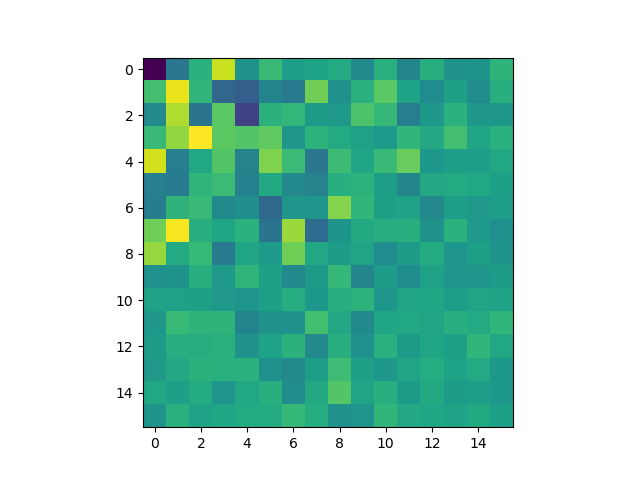

/var/folders/gt/qhbvbx5d1hv7mm6w7y4738c40000gn/T/ipykernel_92471/245766437.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


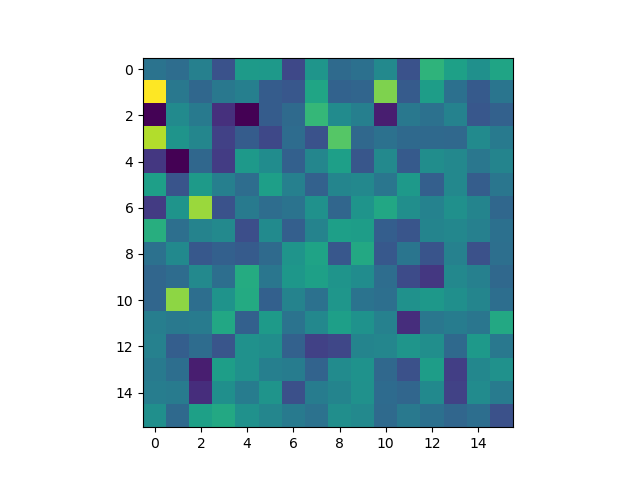

In [4]:
nn = [150, 64, 78]
slice_inds = [0,15,31]
for n in nn:
    # site_energies = np.load(datadir + f'corr_energies_{N1}x{N2}x{N2}/correlated_energies-{n}.npy')
    mgfft = np.load(datadir + f'mgf_fts_{N1}x{N2}x{N2}/ft_mol_geom_field-{n}.npy')
    for i in slice_inds:
        fig, ax = plt.subplots()
        ax.imshow(mgfft[i,:,:])
        plt.show()